#Least-squares Fitting Tests and Linear Fitting

Currently having issues with how the scipy.optimize.curve_fit function is calculating the errors in the fit to hot and cool branches of the $\mathrm{EM}(T)$ curve. Errors seem to be too low, especially in the low $T_N$ cases where the fit is pretty bad for both the hot and the cool sides, especially the cool sides.

Let's create a few test cases and then try out the SciPy curve fitting procedure as well as a homebrewed one.

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_dem as ebd

##Case 1

First, let's try a superposition of a linear function with an oscillatory (sine wave) function and maybe add in some noise as well. Our function will look like $$f_1(x)=x + \sin{x} + \mathrm{noise}$$

In [6]:
def function_1(x,period,noise_level):
    linear = x
    oscillate = np.sin(period*x)
    np.random.seed()
    noise = noise_level*np.max(oscillate)*np.random.rand(len(x))
    return linear + oscillate + noise

In [7]:
x = np.linspace(0,2*np.pi,100)
y = function_1(x,5,0.75)

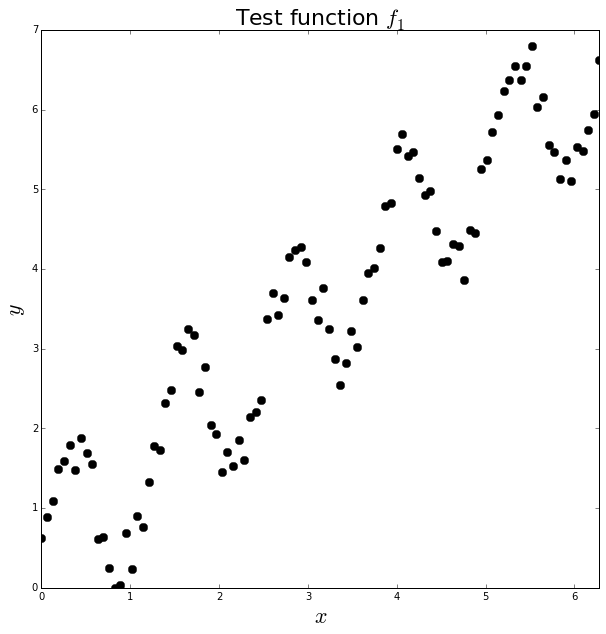

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$',fontsize=22)
plt.show()

Now, let's try to perform a linear fit to this function with the SciPy curve fitting function, using both a weighted and an unweighted approach.

In [9]:
def linear_fit(x,a,b):
    return a*x + b

In [10]:
pars,covar = curve_fit(linear_fit,x,y)

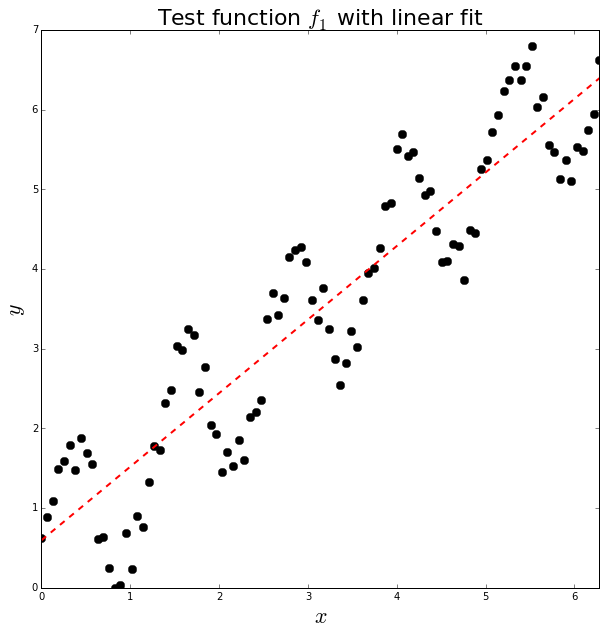

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with linear fit',fontsize=22)
plt.show()

Now, what is the associated error with each of the fit parameters? Obviously, the curve (or at least the oscillatory part of it) is not well described by a linear function. Thus, our fit parameters should have a decent amount of uncertainty associated with them.

In [12]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.922583, b_fit = 0.596895
sigma_a = 0.040219, sigma_b = 0.146266


Next, let's use a Monte-Carlo approach to estimate the uncertainty at each point for our function.

In [13]:
y_mc_f1 = []
n_mc = 100
for i in range(n_mc):
    y_mc_f1.append(function_1(x,5,0.75))
    
y_mean_f1 = np.mean(y_mc_f1,axis=0)
x_mean_f1 = x
y_sigma_f1 = np.std(y_mc_f1,axis=0)

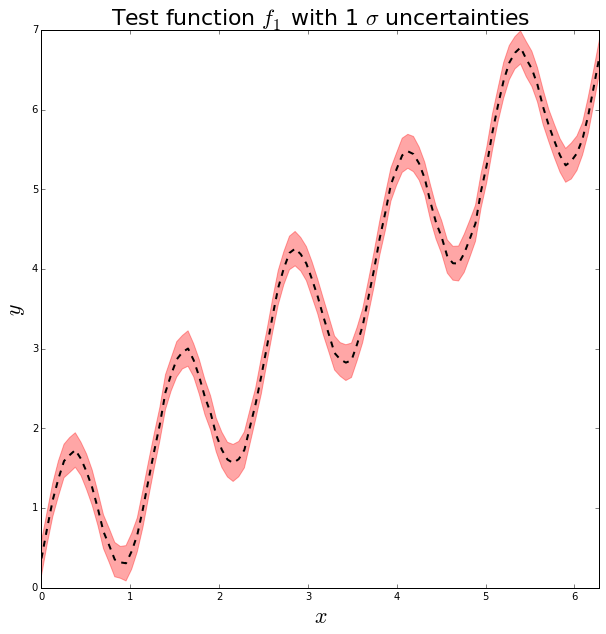

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean_f1 - y_sigma_f1,y_mean_f1 + y_sigma_f1,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean_f1,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

Next, we'll perform a linear to this function using the 1 $\sigma$ uncertainties generated using our MC method.

In [15]:
pars,covar = curve_fit(linear_fit,x,y_mean_f1,sigma=y_sigma_f1,absolute_sigma=True)

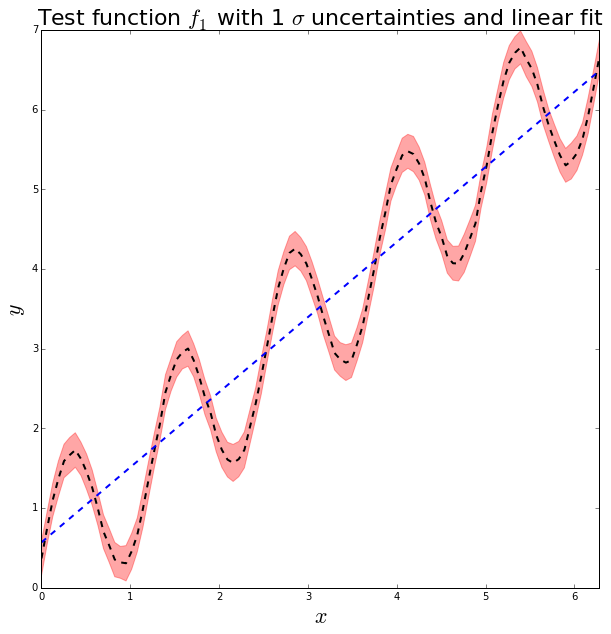

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean_f1 - y_sigma_f1,y_mean_f1 + y_sigma_f1,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean_f1,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

Is there any difference between the fit uncertainties/errors when we use the $\sigma$ weights and when we don't?

In [17]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.941635, b_fit = 0.570572
sigma_a = 0.011750, sigma_b = 0.042748


##Case 2

In [18]:
def function_2(x,b,noise_level):
    np.random.rand()
    return -x**2 + b*x + noise_level*b*np.random.rand(len(x))

In [19]:
x = np.linspace(0,10,100)
y = function_2(x,20,0.5)

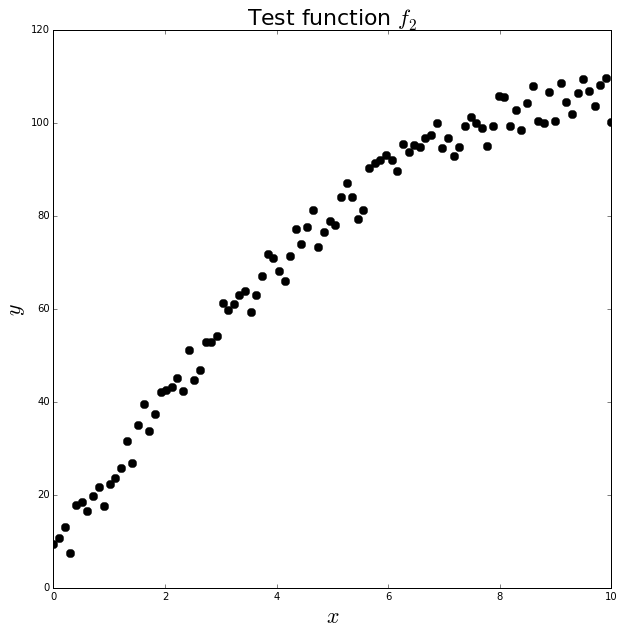

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$',fontsize=22)
plt.show()

Now, let's again do a linear fit to the function.

In [21]:
pars,covar = curve_fit(linear_fit,x,y)

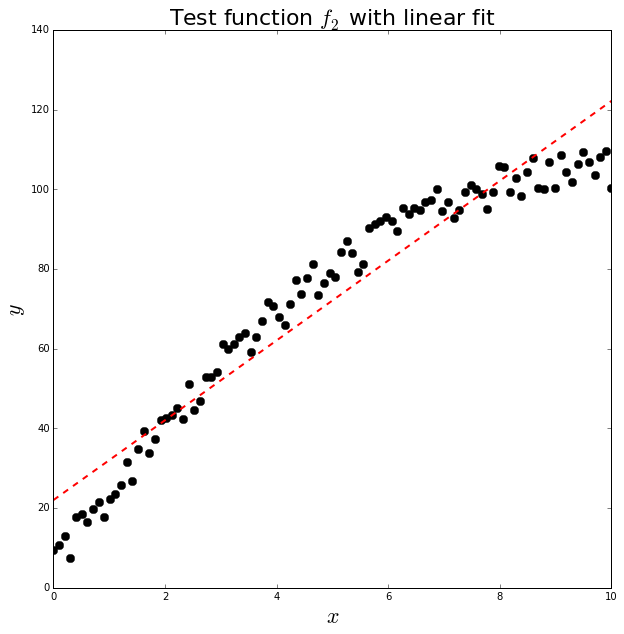

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with linear fit',fontsize=22)
plt.show()

In [23]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 10.013783, b_fit = 22.016892
sigma_a = 0.283157, sigma_b = 1.638929


Again, let's try our MC approach for this function as well.

In [24]:
y_mc = []
n_mc = 1000
for i in range(n_mc):
    y_mc.append(function_2(x,20,0.5))
    
y_mean = np.mean(y_mc,axis=0)
y_sigma = np.std(y_mc,axis=0)

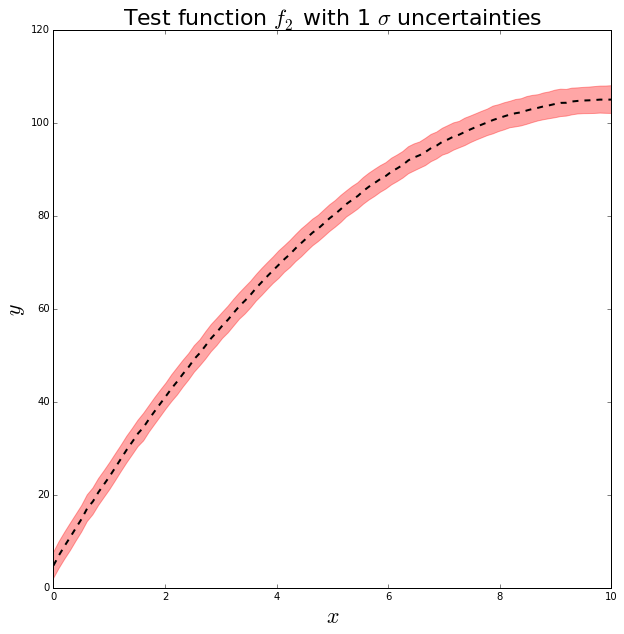

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

In [26]:
pars,covar = curve_fit(linear_fit,x,y_mean,sigma=y_sigma,absolute_sigma=True)

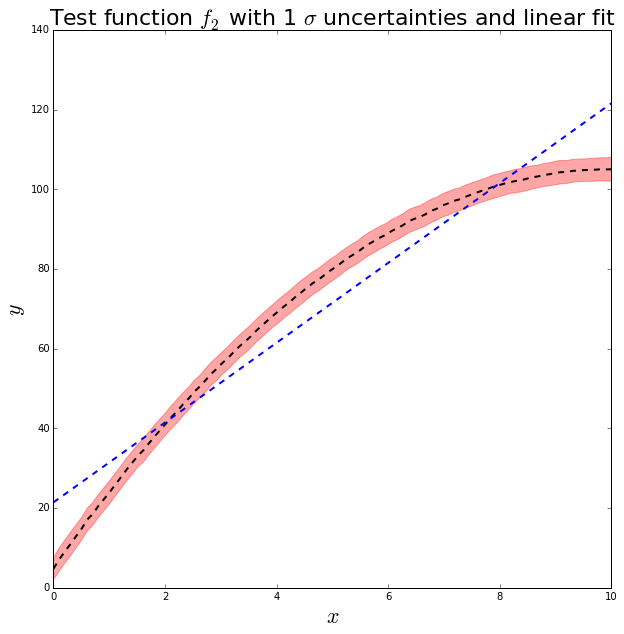

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

In [28]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 10.013988, b_fit = 21.440071
sigma_a = 0.098919, sigma_b = 0.571036


##Case 3

Finally, let's try to do a linear fit to some function that has no linear component at all.

In [29]:
def function_3(x,noise_level):
    np.random.seed()
    return noise_level*np.random.rand(len(x)) - x**3 - 2*x**2

In [30]:
x = np.linspace(-2,1,100)
y = function_3(x,0.2)

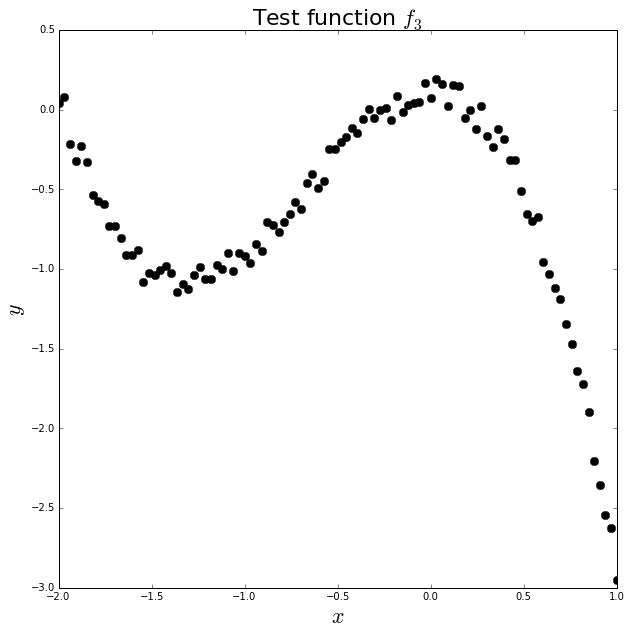

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

We'll select a region on this plot that is roughly linear by inspection.

In [32]:
y_linear = y[(x>-1.5) & (x<0.25)]
x_linear = x[(x>-1.5) & (x<0.25)]

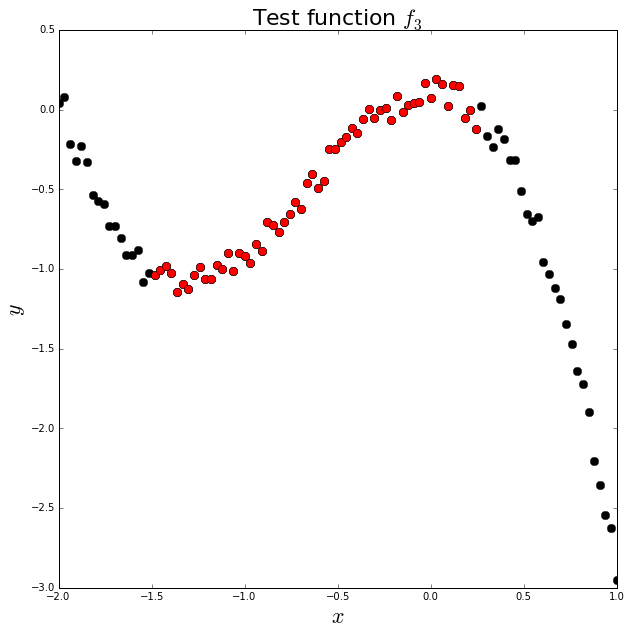

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

Now, we'll fit to this roughly linear section using the same function as before.

In [34]:
pars,covar = curve_fit(linear_fit,x_linear,y_linear)

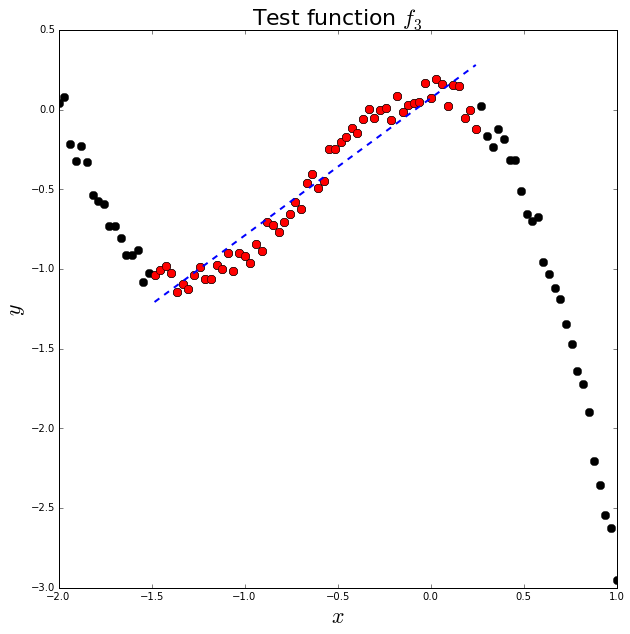

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.plot(x_linear,pars[0]*x_linear + pars[1],'b--',linewidth=2)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

In [36]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0]/pars[0],np.sqrt(np.diag(covar))[1]/pars[1]))

a_fit = 0.860941, b_fit = 0.071012
sigma_a = 0.040311, sigma_b = 0.391979


##Bootstrap Method

Let's return to our data from Case 1. We have the mean $\bar{y}$ from our randomly-fluctuating data set and a set of standard deviations $\{\sigma\}$ for each point $\bar{y}_i$. We'd now like to use the bootstrap method to estimate the errors associated with the fit to our mean curve. To do this, we first generate $1\le j\le N_B$ datasets using a Monte-Carlo like method to add fluctuations in each dataset based on $\sigma_i$. For each of the $N_B$ data sets, we calculate the fit to the data $(a_j,b_j)$. Then, we take the standard deviation of all of these results,  $\sigma_a,\sigma_b$, as our confidence interval for $(\bar{a},\bar{b})$.

In [37]:
def bootstrap_method(xdata,ydata,yerrors,Nb):
    
    #generate Nb synthetic datasets and do curve fitting
    fit_boot =[]
    for i in range(Nb):
        boot_delta = []
        [boot_delta.append(np.random.normal(0,err,1)[0]) for err in yerrors]
        y_boot = ydata + boot_delta
        pars,covar = curve_fit(linear_fit,xdata,y_boot)
        fit_boot.append(pars)
        
    #Take the standard deviation and mean of the parameters
    fit_boot = np.array(fit_boot)
    fit_mean = np.mean(fit_boot,axis=0)
    fit_sigma = np.std(fit_boot,axis=0)
    
    return fit_mean,fit_sigma        

Now, let's apply our boostrap method to our simulated data sets from Case 1.

In [38]:
f1_mean,f1_sigma = bootstrap_method(x_mean_f1,y_mean_f1,y_sigma_f1,1000)

In [39]:
print("<a> = %f, <b> = %f"%(f1_mean[0],f1_mean[1]))
print("sigma_a = %f, sigma_b = %f"%(f1_sigma[0],f1_sigma[1]))

<a> = 0.941152, <b> = 0.562595
sigma_a = 0.011559, sigma_b = 0.042023


This is about the same as if we had used the covariance matrix from the resulting fit. Does it make any difference if we instead just do the fit for each one of our original simulated data sets and then calculate the error from those resulting standard deviations?

In [40]:
fit_mc_f1 = []
for y in y_mc_f1:
    pars,covar = curve_fit(linear_fit,x_mean_f1,y)
    fit_mc_f1.append(pars)
    
mc_mean = np.mean(fit_mc_f1,axis=0)
mc_sigma = np.std(fit_mc_f1,axis=0)

print("<a> = %f, <b> = %f"%(mc_mean[0],mc_mean[1]))
print("sigma_a = %f, sigma_b = %f"%(mc_sigma[0],mc_sigma[1]))

<a> = 0.941069, <b> = 0.562981
sigma_a = 0.012406, sigma_b = 0.045389


It doesn't appear to make much difference with regards to which method we use, though our simulated data in this case is quite mundane. Next, let's try this method out on some sample $\mathrm{EM}(T)$ curves for varying $T_N$.

##Example Emission Measure Data Set

First, import all of the data. We'll just use $\alpha=-1.5$, electron heating, $L=40.0$ Mm as an example.

In [41]:
root_dir = '/data/datadrive2/EBTEL-2fluid_runs/'
species = 'electron'
tpulse = 100.0
alpha = 1.5
loop_length = 40.0
solver = 'rka4'
Tn = np.arange(250,5250,250)

In [42]:
process = ebd.DEMProcess(root_dir,species,alpha,loop_length,tpulse,solver,verbose=True)

In [43]:
process.import_raw(Tn)

Unable to process file for Tn = 250, run = 44
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 500, run = 75
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 750, run = 106
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1000, run = 137
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1250, run = 167
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1500, run = 200
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 1750, run = 228
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2000, run = 257
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2250, run = 286
Reached end of list or there was an error reading the file.
Unable to process file for Tn = 2

Now, we'll calculate the mean and standard deviation over all of our MC runs.

In [44]:
process.calc_stats()

Now, we need to choose a particular $T_N$ value. We'll grab $T_N=5000$ s as an example and use the (approximate) cool side.

In [52]:
cool_em_mean = process.em_mean[-1][(process.temp_mean[-1]>6.0) & (process.temp_mean[-1]<6.6)]
cool_temp_mean = process.temp_mean[-1][(process.temp_mean[-1]>6.0) & (process.temp_mean[-1]<6.6)]
cool_em_sigma = process.em_std[-1][(process.temp_mean[-1]>6.0) & (process.temp_mean[-1]<6.6)]

In [53]:
print(cool_em_mean)
print(cool_temp_mean)
print(cool_em_sigma)

[ 27.77180128  27.79106336  27.80982902  27.828814    27.84713373
  27.86579586  27.88400147  27.90160728  27.91953774  27.93831469
  27.95787312  27.97813246  27.99907978  28.02096971  28.04355344
  28.06680784  28.09058211  28.11521099  28.14049589  28.16610046
  28.19245638  28.21901038  28.24636909  28.2734171   28.30167141
  28.32972403  28.35789821  28.38605314  28.41408589  28.44189494
  28.46959552  28.49715008  28.52431728  28.55163766  28.57844803
  28.60513981  28.63166923  28.65798045  28.6838144   28.70955859
  28.73498603  28.75988328  28.78484941  28.80916464  28.83276722
  28.85608533  28.87797749  28.89872813  28.91820051  28.93667784
  28.95397034  28.97023424  28.98541424  28.99948928  29.0126381
  29.02475112  29.03589971  29.04596702  29.05503976  29.06318763]
[ 6.01  6.02  6.03  6.04  6.05  6.06  6.07  6.08  6.09  6.1   6.11  6.12
  6.13  6.14  6.15  6.16  6.17  6.18  6.19  6.2   6.21  6.22  6.23  6.24
  6.25  6.26  6.27  6.28  6.29  6.3   6.31  6.32  6.33  6.34  

Now, we'll apply our bootstrap method as implemented above to these test cases.

In [54]:
em_cool_test_mean_bs,em_cool_test_sigma_bs = bootstrap_method(cool_temp_mean,cool_em_mean,cool_em_sigma,1000)

In [55]:
print("<a> = %f, <b> = %f"%(em_cool_test_mean_bs[0],em_cool_test_mean_bs[1]))
print("sigma_a = %f, sigma_b = %f"%(em_cool_test_sigma_bs[0],em_cool_test_sigma_bs[1]))

<a> = 2.399514, <b> = 13.316917
sigma_a = 0.036248, sigma_b = 0.226341


We probably shouldn't expect the cool fit to be that bad, especially for $T_N=5000$ s. Let's try the more uncertain hot branch.

In [56]:
hot_em_mean = process.em_mean[-1][(process.temp_mean[-1]>6.6) & (process.temp_mean[-1]<7.2)]
hot_temp_mean = process.temp_mean[-1][(process.temp_mean[-1]>6.6) & (process.temp_mean[-1]<7.2)]
hot_em_sigma = process.em_std[-1][(process.temp_mean[-1]>6.6) & (process.temp_mean[-1]<7.2)]

In [57]:
em_hot_test_mean_bs,em_hot_test_sigma_bs = bootstrap_method(hot_temp_mean,hot_em_mean,hot_em_sigma,1000)

In [58]:
print("<a> = %f, <b> = %f"%(em_hot_test_mean_bs[0],em_hot_test_mean_bs[1]))
print("sigma_a = %f, sigma_b = %f"%(em_hot_test_sigma_bs[0],em_hot_test_sigma_bs[1]))

<a> = -2.289380, <b> = 44.518627
sigma_a = 0.098611, sigma_b = 0.670898


In [59]:
print(hot_em_mean)
print(hot_temp_mean)
print(hot_em_sigma)

[ 29.07013867  29.07636718  29.08143464  29.08566027  29.08931766
  29.09232013  29.09461966  29.09634413  29.09724744  29.09745934
  29.09700349  29.09566162  29.09345318  29.09059803  29.08690314
  29.0824277   29.07709035  29.07073037  29.0634649   29.05541155
  29.04598286  29.03581325  29.02480642  29.01282544  29.00005902
  28.98618981  28.97138488  28.95532302  28.93815003  28.91965629
  28.89976707  28.87836221  28.85525078  28.83017115  28.80313981
  28.77401806  28.74296523  28.70946707  28.67408666  28.63660773
  28.59694294  28.55527222  28.51134421  28.46542184  28.41748418
  28.36815638  28.3174392   28.26575669  28.21372072  28.16194328
  28.11116149  28.06244982  28.01690618  27.97553646  27.9393771
  27.90801066  27.88109502  27.85753768  27.83653526  27.81730496]
[ 6.61  6.62  6.63  6.64  6.65  6.66  6.67  6.68  6.69  6.7   6.71  6.72
  6.73  6.74  6.75  6.76  6.77  6.78  6.79  6.8   6.81  6.82  6.83  6.84
  6.85  6.86  6.87  6.88  6.89  6.9   6.91  6.92  6.93  6.94  